![Logo TUBAF](https://tu-freiberg.de/sites/default/files/media/freiberger-alumni-netzwerk-6127/wbm_orig_rgb_0.jpg)

Exercise material of the MSc-level course **Foundations of Soil Mechanics**.
Held at Technische Universität Bergakademie Freiberg.

Comments to:

*Prof. Dr. Thomas Nagel  
Chair of Soil Mechanics and Foundation Engineering  
Geotechnical Institute  
Technische Universität Bergakademie Freiberg.*

https://tu-freiberg.de/en/fakultaet3/gt/soilmechanics


# Kinematische Elemente Methode

In [1]:
import numpy as np #numerical methods
import matplotlib.pyplot as plt #plotting
import pandas as pd

#Some plot settings
import plot_functions.plot_settings
%run plot_functions/KEM_plots.ipynb

Wir definieren zunächst die Geometrie des Problems, legen also die kinematischen Elemente des Bruchmechanismus fest.

In [2]:
geometry = pd.DataFrame(np.array([[1,2,3,4,5,6,7,8,9],
                                  [6.9,5.5,4.63,5.88,4.6,3.78,2.5,2.36,0.0],
                                  [4.0,4.0,2.84,1.68,-0.2,1.71,0.0,-1.1,0.0]]).T,
                   columns=['Pkt', 'x / m', 'y / m'])
geometry

,Pkt,x / m,y / m
0,1.0,6.90,4.00
1,2.0,5.50,4.00
2,3.0,4.63,2.84
3,4.0,5.88,1.68
4,5.0,4.60,-0.20
5,6.0,3.78,1.71
6,7.0,2.50,0.00
7,8.0,2.36,-1.10
8,9.0,0.00,0.00


In [3]:
#Achtung: Nummerierung im Umlaufsinn!
block1 = define_element(geometry,[1,2,3,4])
block2 = define_element(geometry,[4,3,6,5])
block3 = define_element(geometry,[5,6,7,8])
block4 = define_element(geometry,[8,7,9])

In der Darstellung ergibt sich folgende Böschungsgeometrie.

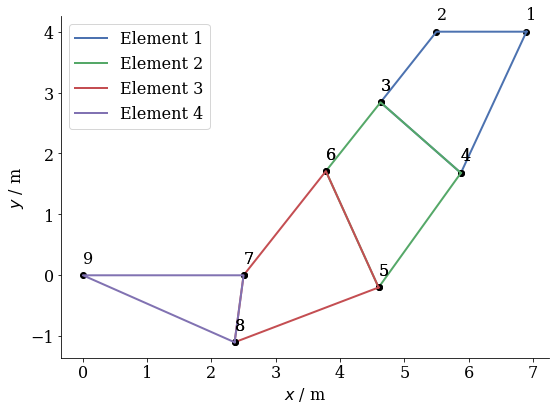

In [4]:
plot_blocks([block1,block2,block3,block4])

Jetzt können wir bereits einige wesentliche Größen ausrechnen. Genauer gesagt, können wir die Gewichtskräfte der einzelnen kinematischen Elemente aus ihren Flächeninhalten ableiten. Dazu legen wir die wesentlichen Materialeigenschaften fest.

In [5]:
#Wichte in kN/m³
gamma = 16.
#Kohäsion in kN/m²
c = 5
#Reibungswinkel in rad
phi = np.deg2rad(30)

In [6]:
data = {'A / m²': np.array([block_area(block1),block_area(block2),block_area(block3),block_area(block4)])} #in m

In [7]:
data['G / kN/m'] = data['A / m²']*gamma

In [8]:
blockdata = pd.DataFrame(data)
blockdata

,A / m²,G / kN/m
0,2.85360,45.6576
1,3.19245,51.0792
2,3.09250,49.4800
3,1.37500,22.0000


Am unteren Körper lässt sich direkt das Kräftegleichgewicht konstruieren: Wir kennen die Gewichtskraft sowie die Wirkungslinien der Reibungs- und Kohäsionskräfte in den beiden Gleitfugen. Der Richtungssinn der letzteren beiden Kräfte folgt aus dem Geschwindigkeitsplan. Außerdem sind die Normalenkräfte anzusetzen. Normalkraft $N$ und Reibungskraft $R$ werden zur Gleitfugenresultierenden $Q$ zuammengefasst und aus dem Kräftegleichgewicht bestimmt, während sich die Kohäsionskräfte $C$ aus dem Bruchmechanismus ableiten.

## Kräftegleichgewicht am Element 4

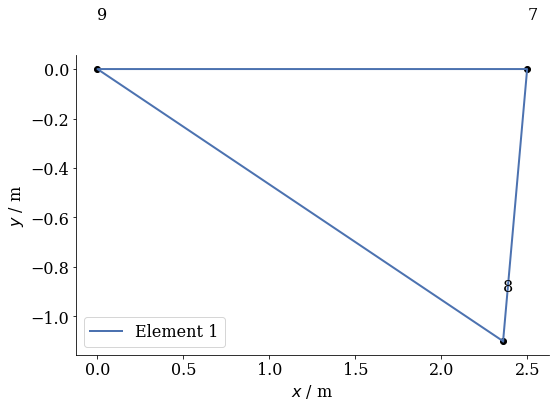

In [9]:
plot_blocks([block4])

Sammeln wir zunächst die aus der Geometrie und den Materialeigenschaften bekannten Vektoren $\vec{G}_4$, $\vec{C}_{98}$ und $\vec{C}_{78}$. Dabei gelte an Grenzflächen die Konvention $\vec{F}_{\text{von}\,\text{bis}}$, wodurch über die Reihenfolge der Indizes die Wirkrichtung festgelegt ist.

In [10]:
G_4 = gravity_vector(blockdata,4)
G_4

array([  0., -22.])

In [11]:
C_98 = cohesion(c,geometry,9,8)
print("Die Kohäsionskraft beträgt %.2f kN/m" %np.linalg.norm(C_98))
C_98

Die Kohäsionskraft beträgt 13.02 kN/m


array([11.8, -5.5])

In [12]:
C_78 = cohesion(c,geometry,7,8)
print("Die Kohäsionskraft beträgt %.2f kN/m" %np.linalg.norm(C_78))
C_78

Die Kohäsionskraft beträgt 5.54 kN/m


array([-0.7, -5.5])

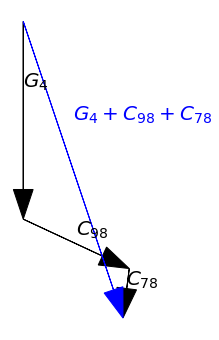

In [13]:
scale = np.linalg.norm(G_4)
fig, ax = plt.subplots()
vec_from_by(ax,delta=G_4,label='$G_4$',scale=scale)
vec_from_by(ax,fro=G_4,delta=C_98,label='$C_{98}$',scale=scale)
vec_from_by(ax,fro=G_4+C_98,delta=C_78,label='$C_{78}$',scale=scale)
vec_from_by(ax,delta=G_4+C_98+C_78,label='$G_4 + C_{98} + C_{78}$',scale=scale,col='blue')
ax.set(adjustable='box', aspect='equal')
plt.axis('off');

Ausgehend von der Wirkungsrichtung von $\vec{C}_{\text{von}\,\text{bis}}$ ergibt sich die Wirkungsrichtung der Gleitfugenresultierenden $\vec{Q}_{\text{von}\,\text{bis}}$ durch Rotation um $90° - \varphi$ gegen den Uhrzeigersinn (mathematisch positiv) oder im Uhrzeigersinn (mathematisch negativ), da $\vec{Q}$ gegenüber dem Lot auf die Gleitfläche (Wirkungslinie von $\vec{N}$) um den Reibungswinkel $\varphi$ geneigt ist und ebenso wie $\vec{C}$ der Bewegung des Gleitkörpers entgegen wirkt.

Zur Rotation von Vektoren werden Rotationsmatrizen festgelegt.

In [14]:
beta = np.deg2rad(90) - phi
Rp = np.array([[np.cos(beta),-np.sin(beta)],[np.sin(beta),np.cos(beta)]])
Rn = np.array([[np.cos(-beta),-np.sin(-beta)],[np.sin(-beta),np.cos(-beta)]])

In der Darstellung siht das wie folgt aus:

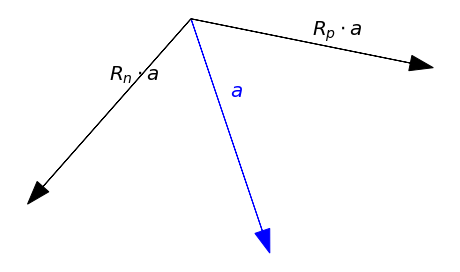

In [15]:
scale = np.linalg.norm(G_4)
fig, ax = plt.subplots()
a= G_4+C_98+C_78
vec_from_by(ax,delta=a,label='$a$',scale=scale,col='blue')
vec_from_by(ax,delta=Rp.dot(a),label='$R_p \cdot a$',scale=scale)
vec_from_by(ax,delta=Rn.dot(a),label='$R_n \cdot a$',scale=scale)
ax.set(adjustable='box', aspect='equal')
plt.axis('off');

Nun können wir die Wirkungslinien von $\vec{Q}_{98}$ und $\vec{Q}_{78}$ bestimmen. Diese sind durch die folgenden Einheitsvektoren $\vec{e}_{Q_{78}}$ und $\vec{e}_{Q_{98}}$ gegeben.

In [16]:
e_Q98 = line_of_Q(geometry,Rp,9,8)
e_Q78 = line_of_Q(geometry,Rn,7,8)

Aus dem Schnittpunkt beider Wirkungslinien ergeben sich graphisch die Beträge der gesuchten Kraftvektoren (Zeichenmaßstab beachten!).

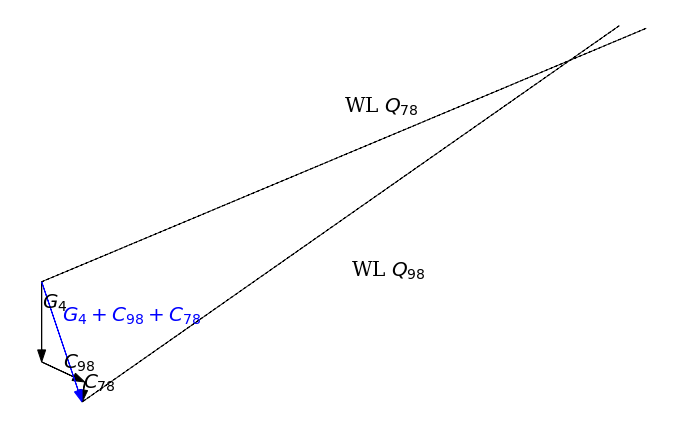

In [17]:
scale = np.linalg.norm(G_4)
fig, ax = plt.subplots(figsize=(12,12))
vec_from_by(ax,delta=G_4,label='$G_4$',scale=scale)
vec_from_by(ax,fro=G_4,delta=C_98,label='$C_{98}$',scale=scale)
vec_from_by(ax,fro=G_4+C_98,delta=C_78,label='$C_{78}$',scale=scale)
vec_from_by(ax,delta=G_4+C_98+C_78,label='$G_4 + C_{98} + C_{78}$',scale=scale,col='blue')
#
line_from_by(ax,-e_Q78*180,e_Q78,scale=180,ls='--',label='WL ${Q_{78}}$')
line_from_by(ax,G_4+C_98+C_78,e_Q98,scale=180,ls='--',label='WL ${Q_{98}}$')
ax.set(adjustable='box', aspect='equal')
plt.axis('off');

Mathematisch gilt es, die Skalierfaktoren $f_i$ zu bestimmen, so dass gilt:

$$
    \vec{0} = \vec{G}_4 + \vec{C}_{98} + \vec{C}_{78} + f_{78} \vec{e}_{Q_{78}} + f_{98} \vec{e}_{Q_{78}}
$$

Somit stehen zwei Gleichungen für die 2 Unbekannten zur Verfügung. Wir stellen die Gleichung in die Form

$$
    A_{ij} f_j = b_i 
$$

um (Sie können auch beide Gleichungen ausschreiben und sie direkt umstellen).

In [18]:
b4 = -(G_4 + C_98 + C_78)

In [19]:
A4 = np.array([e_Q78,e_Q98]).T

In [20]:
f4 = np.linalg.solve(A4,b4)

In [21]:
Q_78 = e_Q78 * f4[0]
print("Die Resultierende beträgt %.2f kN/m" %np.linalg.norm(Q_78))

Die Resultierende beträgt 157.24 kN/m


In [22]:
Q_98 = e_Q98 * f4[1]
print("Die Resultierende beträgt %.2f kN/m" %np.linalg.norm(Q_98))

Die Resultierende beträgt 163.49 kN/m


Mit der graphischen Darstellung des Ergebnisses überprüfen wir, ob wir richtig gerechnet haben.

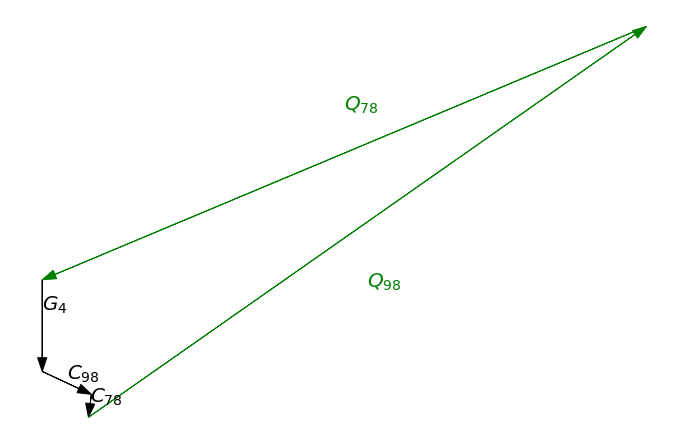

In [23]:
scale = np.linalg.norm(G_4)
fig, ax = plt.subplots(figsize=(12,12))
vec_from_by(ax,delta=G_4,label='$G_4$',scale=scale)
vec_from_by(ax,fro=G_4,delta=C_98,label='$C_{98}$',scale=scale)
vec_from_by(ax,fro=G_4+C_98,delta=C_78,label='$C_{78}$',scale=scale)
#
vec_from_by(ax,-Q_78,Q_78,scale=scale,label='${Q_{78}}$',col='green')
vec_from_by(ax,G_4+C_98+C_78,Q_98,scale=scale,label='${Q_{98}}$',col='green')
ax.set(adjustable='box', aspect='equal')
plt.axis('off');

## Kräftegleichgewicht an Element 3

Nun, da der Prozess klar ist, wiederholen wir ihn und hangeln uns von Element zu Element.

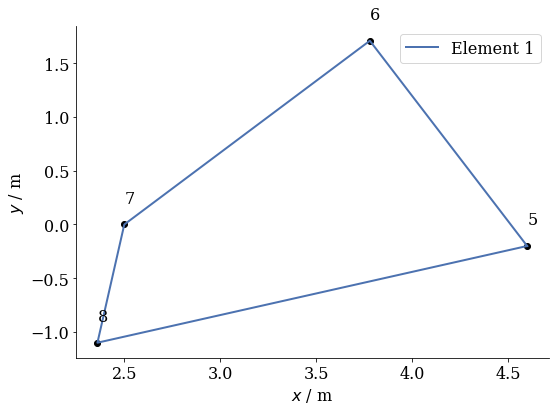

In [24]:
plot_blocks([block3])

Wegen des Schnittprinzips (Kräftegleichgewicht) sind neben der Gewichtskraft bereits folgende Kräfte bekannt: $C_{87} = -C_{78}$, $Q_{87} = - Q_{78}$. Daneben können wir die Kohäsionskräfte $C_{85}$ und $C_{65}$ aus der Geometrie des Gleitkörpers ableiten.

In [25]:
G_3 = gravity_vector(blockdata,3)
C_87 = - C_78
Q_87 = - Q_78

In [26]:
C_85 = cohesion(c,geometry,8,5)
print("Die Kohäsionskraft beträgt %.2f kN/m" %np.linalg.norm(C_85))
C_85

Die Kohäsionskraft beträgt 12.07 kN/m


array([11.2,  4.5])

In [27]:
C_65 = cohesion(c,geometry,6,5)
print("Die Kohäsionskraft beträgt %.2f kN/m" %np.linalg.norm(C_65))
C_65

Die Kohäsionskraft beträgt 10.39 kN/m


array([ 4.1 , -9.55])

Die die Wirkungslinien von $Q_{85}$ und $Q_{65}$ charakterisierenden Einheitsvektoren bestimmen wir wieder durch Rotation der Wirkungslinien der Kohäsionskräfte.

In [28]:
e_Q85 = line_of_Q(geometry,Rp,8,5)
e_Q65 = line_of_Q(geometry,Rn,6,5)

Das können wir nun graphisch darstellen.

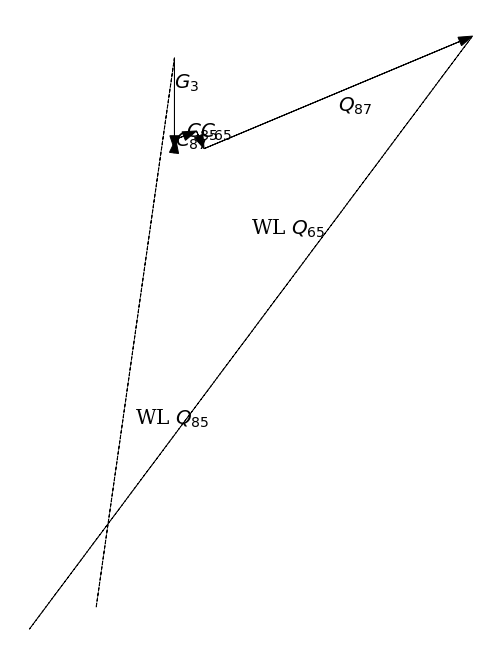

In [29]:
scale = np.linalg.norm(G_3)
fig, ax = plt.subplots(figsize=(12,12))
vec_from_by(ax,delta=G_3,label='$G_3$',scale=scale)
vec_from_by(ax,fro=G_3,delta=C_87,label='$C_{87}$',scale=scale)
vec_from_by(ax,fro=G_3+C_87,delta=C_85,label='$C_{85}$',scale=scale)
vec_from_by(ax,fro=G_3+C_87+C_85,delta=C_65,label='$C_{65}$',scale=scale)
vec_from_by(ax,fro=G_3+C_87+C_85+C_65,delta=Q_87,label='$Q_{87}$',scale=scale)
#
line_from_by(ax,-e_Q85*300,e_Q85,scale=300,ls='--',label='WL ${Q_{85}}$')
line_from_by(ax,G_3+C_87+C_85+C_65+Q_87,e_Q65,scale=400,ls='--',label='WL ${Q_{65}}$')
ax.set(adjustable='box', aspect='equal')
plt.axis('off');

Nun lösen wir wieder folgende Vektorgleichung zur Bestimmung des Schnittpunktes der beiden Wirkungslinien:

$$
    \vec{0} = \vec{G}_3 + \vec{C}_{87} + \vec{C}_{85} + \vec{C}_{65} + Q_{87} + f_{85} \vec{e}_{Q_{85}} + f_{65} \vec{e}_{Q_{65}}
$$

In [30]:
b3 = -(G_3 + C_87 + C_85 + C_65 + Q_87)

In [31]:
A3 = np.array([e_Q85,e_Q65]).T

In [32]:
f3 = np.linalg.solve(A3,b3)

In [33]:
Q_85 = e_Q85 * f3[0]
print("Die Resultierende beträgt %.2f kN/m" %np.linalg.norm(Q_85))

Die Resultierende beträgt 254.29 kN/m


In [34]:
Q_65 = e_Q65 * f3[1]
print("Die Resultierende beträgt %.2f kN/m" %np.linalg.norm(Q_65))

Die Resultierende beträgt 328.94 kN/m


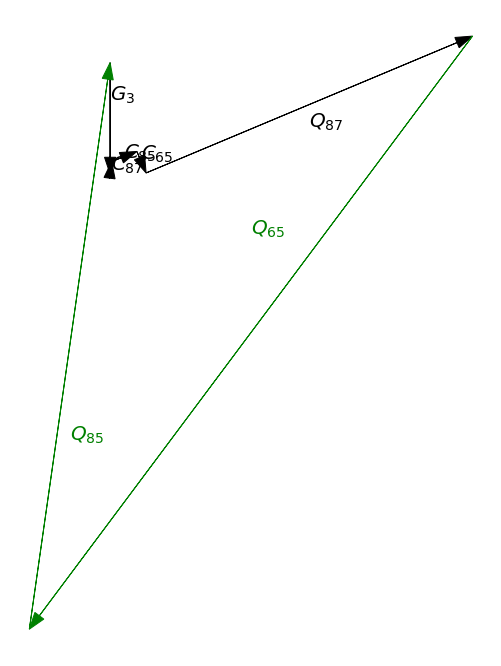

In [35]:
scale = np.linalg.norm(G_3)
fig, ax = plt.subplots(figsize=(12,12))
vec_from_by(ax,delta=G_3,label='$G_3$',scale=scale)
vec_from_by(ax,fro=G_3,delta=C_87,label='$C_{87}$',scale=scale)
vec_from_by(ax,fro=G_3+C_87,delta=C_85,label='$C_{85}$',scale=scale)
vec_from_by(ax,fro=G_3+C_87+C_85,delta=C_65,label='$C_{65}$',scale=scale)
vec_from_by(ax,fro=G_3+C_87+C_85+C_65,delta=Q_87,label='$Q_{87}$',scale=scale)
#
vec_from_by(ax,-Q_85,Q_85,scale=scale,label='${Q_{85}}$',col='green')
vec_from_by(ax,G_3+C_87+C_85+C_65+Q_87,Q_65,scale=scale,label='${Q_{65}}$',col='green')
ax.set(adjustable='box', aspect='equal')
plt.axis('off');

## Kräftegleichgewicht an Element 2

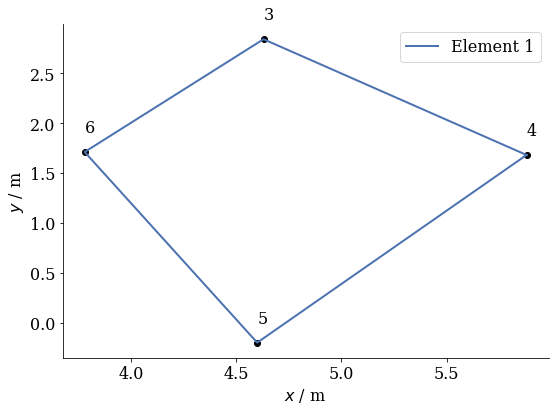

In [36]:
plot_blocks([block2])

Wegen des Schnittprinzips (Kräftegleichgewicht) sind neben der Gewichtskraft bereits folgende Kräfte bekannt: $C_{56} = -C_{65}$, $Q_{56} = - Q_{65}$. Daneben können wir die Kohäsionskräfte $C_{54}$ und $C_{34}$ aus der Geometrie des Gleitkörpers ableiten.

In [37]:
G_2 = gravity_vector(blockdata,2)
C_56 = - C_65
Q_56 = - Q_65

In [38]:
C_54 = cohesion(c,geometry,5,4)
print("Die Kohäsionskraft beträgt %.2f kN/m" %np.linalg.norm(C_54))
C_54

Die Kohäsionskraft beträgt 11.37 kN/m


array([6.4, 9.4])

In [39]:
C_34 = cohesion(c,geometry,3,4)
print("Die Kohäsionskraft beträgt %.2f kN/m" %np.linalg.norm(C_34))
C_34

Die Kohäsionskraft beträgt 8.53 kN/m


array([ 6.25, -5.8 ])

Die die Wirkungslinien von $Q_{54}$ und $Q_{34}$ charakterisierenden Einheitsvektoren bestimmen wir wieder durch Rotation der Wirkungslinien der Kohäsionskräfte.

In [40]:
e_Q54 = line_of_Q(geometry,Rp,5,4)
e_Q34 = line_of_Q(geometry,Rn,3,4)

Das können wir nun graphisch darstellen.

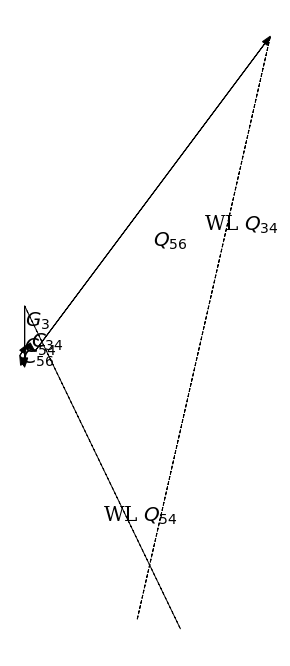

In [41]:
scale = np.linalg.norm(G_2)
fig, ax = plt.subplots(figsize=(12,12))
vec_from_by(ax,delta=G_2,label='$G_3$',scale=scale)
vec_from_by(ax,fro=G_2,delta=C_56,label='$C_{56}$',scale=scale)
vec_from_by(ax,fro=G_2+C_56,delta=C_54,label='$C_{54}$',scale=scale)
vec_from_by(ax,fro=G_2+C_56+C_54,delta=C_34,label='$C_{34}$',scale=scale)
vec_from_by(ax,fro=G_2+C_56+C_54+C_34,delta=Q_56,label='$Q_{56}$',scale=scale)
#
line_from_by(ax,-e_Q54*300,e_Q54,scale=300,ls='--',label='WL ${Q_{54}}$')
line_from_by(ax,G_2+C_56+C_54+C_34+Q_56,e_Q34,scale=500,ls='--',label='WL ${Q_{34}}$')
ax.set(adjustable='box', aspect='equal')
plt.axis('off');

Nun lösen wir wieder folgende Vektorgleichung zur Bestimmung des Schnittpunktes der beiden Wirkungslinien:

$$
    \vec{0} = \vec{G}_2 + \vec{C}_{56} + \vec{C}_{54} + \vec{C}_{34} + Q_{56} + f_{54} \vec{e}_{Q_{54}} + f_{34} \vec{e}_{Q_{34}}
$$

In [42]:
b2 = -(G_2 + C_56 + C_54 + C_34 + Q_56)

In [43]:
A2 = np.array([e_Q54,e_Q34]).T

In [44]:
f2 = np.linalg.solve(A2,b2)

In [45]:
Q_54 = e_Q54 * f2[0]
print("Die Resultierende beträgt %.2f kN/m" %np.linalg.norm(Q_54))

Die Resultierende beträgt 240.47 kN/m


In [46]:
Q_34 = e_Q34 * f2[1]
print("Die Resultierende beträgt %.2f kN/m" %np.linalg.norm(Q_34))

Die Resultierende beträgt 453.56 kN/m


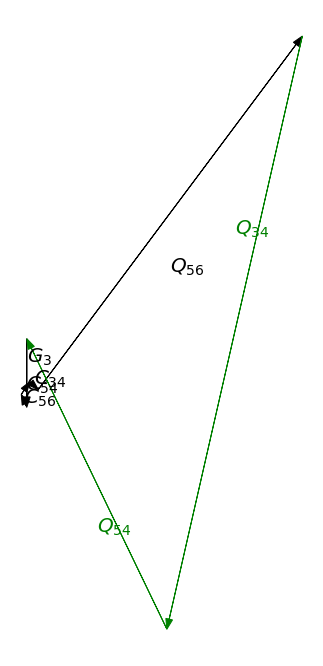

In [47]:
scale = np.linalg.norm(G_2)
fig, ax = plt.subplots(figsize=(12,12))
vec_from_by(ax,delta=G_2,label='$G_3$',scale=scale)
vec_from_by(ax,fro=G_2,delta=C_56,label='$C_{56}$',scale=scale)
vec_from_by(ax,fro=G_2+C_56,delta=C_54,label='$C_{54}$',scale=scale)
vec_from_by(ax,fro=G_2+C_56+C_54,delta=C_34,label='$C_{34}$',scale=scale)
vec_from_by(ax,fro=G_2+C_56+C_54+C_34,delta=Q_56,label='$Q_{56}$',scale=scale)
#
vec_from_by(ax,-Q_54,Q_54,scale=scale,label='${Q_{54}}$',col='green')
vec_from_by(ax,G_2+C_56+C_54+C_34+Q_56,Q_34,scale=scale,label='${Q_{34}}$',col='green')
ax.set(adjustable='box', aspect='equal')
plt.axis('off');